In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler,scale
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

In [51]:
data = pd.read_csv('~/Desktop/Concrete-NN/data/ets.csv')
data = data.drop('Cost ($/m3)',1)
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(data)
column_names = list(data.columns.values)[:-1]
data.describe()

,0.5-1.0 (kg),0.25-0.5 (kg),K1 (kg),Ciment (kg),Laitiers (kg),Latex R (kg),Albitol (kg),Glenium (kg),F'c MPa 14 j,Abs. Dens. (g/cm3)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,73.482664,80.234877,50.338640,178.522248,181.289882,124.789870,99.815348,17.068913,8.497227,0.873415
std,34.420350,34.860651,6.809450,38.019464,34.843665,37.757316,45.080704,14.915623,2.460673,0.064931
min,0.000000,12.919768,28.825710,82.439916,92.769850,0.000000,0.000000,0.000000,0.000000,0.756308
25%,46.356429,54.375227,45.618342,154.087438,156.897582,113.997440,77.362754,5.098365,7.231333,0.818834
50%,72.604154,77.428438,49.168482,171.451832,173.585209,124.223324,93.520122,17.523318,8.483333,0.868359
75%,96.578612,108.529339,55.081167,203.124791,203.124791,142.168461,111.391262,24.978415,9.768833,0.924236
max,168.340486,170.155946,63.619134,305.584052,305.584052,212.309502,298.261024,63.516587,14.982667,1.071770


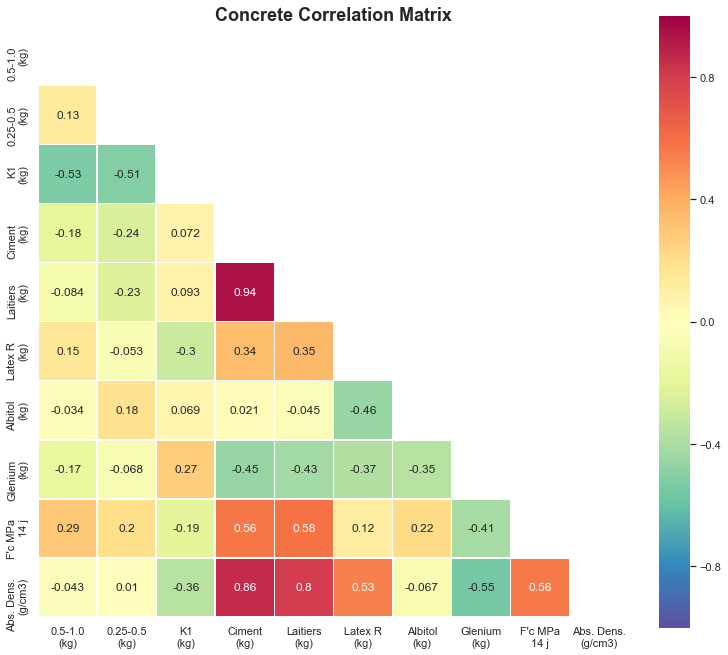

In [49]:
corr = data.corr('spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig,axs = plt.subplots(figsize = (10,10), constrained_layout = True)
plt.title('Concrete Correlation Matrix', fontweight = 'bold', fontsize = 18)
sns.set(style = "white")
sns.heatmap(corr, cmap = 'Spectral_r',square = True, mask = mask,
            vmin = -1.0, vmax = 1.0,cbar_kws = {"shrink": 0.85},
            linewidths = 0.8, linecolor= 'white', annot = True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Text(0.5, 0.98, 'Concrete Clustermap')

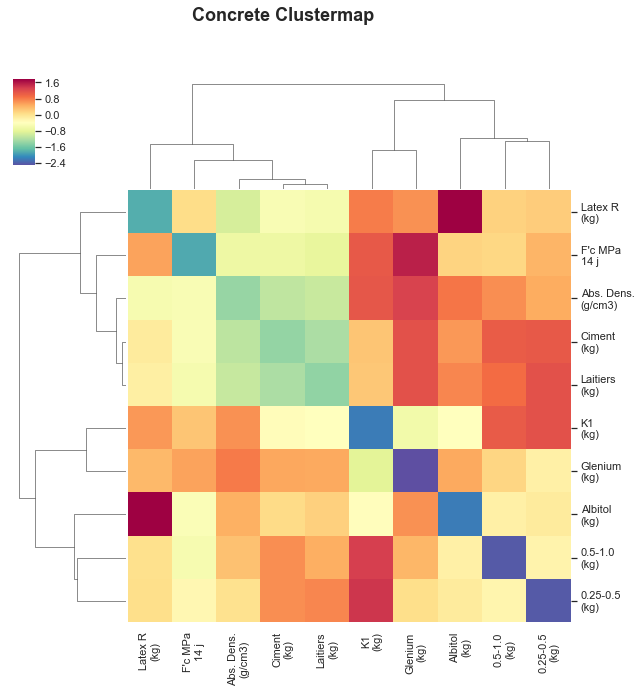

In [73]:
distance = 1- data.corr()
linkage = hc.linkage(sp.distance.squareform(distance), method='ward')
sns.clustermap(distance,row_linkage=linkage, col_linkage=linkage, cmap = 'Spectral_r', z_score = 0,
              ).fig.suptitle('Concrete Clustermap',fontweight = 'bold', fontsize = 18)